(50000, 28, 28) (50000,)


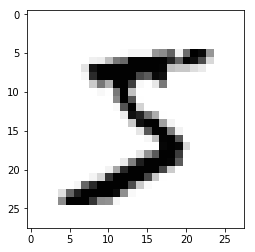

In [228]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [229]:
import tensorflow as tf
import numpy as np
from keras.utils.np_utils import to_categorical
import sys
%matplotlib inline
import matplotlib.pyplot as plt

In [230]:
tf.reset_default_graph()
X_train = X_train.reshape([X_train.shape[0], -1])
y_train = to_categorical(y_train, num_classes=10)
X_val = X_val.reshape([X_val.shape[0], -1])
y_val = to_categorical(y_val, num_classes=10)
X_test = X_test.reshape([X_test.shape[0], -1])
y_test = to_categorical(y_test, num_classes=10)

Define variables for three hidden layers and one output layer.<br>
layer1: 128 neurons with relu activation<br>
layer2: 64 neurons with relu activation<br>
layer3: 32 neurons with relu activation<br>
layer4: output softmax layer for 10 possible labels<br>

In [231]:
W1 = tf.get_variable("W1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1", shape = [256], initializer=tf.zeros_initializer())
W2 = tf.get_variable("W2", shape=[256, 128], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2", shape = [128], initializer=tf.zeros_initializer())
W3 = tf.get_variable("W3", shape=[128, 64], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3", shape = [64], initializer=tf.zeros_initializer())
W4 = tf.get_variable("W4", shape=[64, 10], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.get_variable("b4", shape = [10], initializer=tf.zeros_initializer())

Define inputs.

In [232]:
input_X = tf.placeholder(dtype=tf.float32, shape = [None, 784])
input_y = tf.placeholder(dtype=tf.float32, shape = [None, 10])

Define computational graph.

In [241]:
A1 = tf.nn.relu(tf.matmul(input_X, W1) + b1)
A2 = tf.nn.relu(tf.matmul(A1, W2) + b2)
A3 = tf.nn.relu(tf.matmul(A2, W3) + b3)
logits = tf.matmul(A3, W4) + b4
predicted_y = tf.argmax(tf.nn.softmax(logits), axis = 1)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = input_y))
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 1e-3
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           800, 0.96, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

Training.

In [242]:
sess = tf.Session()
num_epochs = 20
batch_size = 64
sess.run(tf.global_variables_initializer())
check_points = np.floor((np.arange(1, 10))/10*X_train.shape[0] / batch_size) 
loss_vals = np.zeros([num_epochs + 1])
loss_trains = np.zeros([num_epochs + 1])
loss_tests = np.zeros([num_epochs + 1])
loss_vals[0] = sess.run(loss, feed_dict = {input_X: X_val, input_y: y_val})
loss_trains[0] = sess.run(loss, feed_dict = {input_X: X_train, input_y: y_train})
loss_tests[0] = sess.run(loss, feed_dict = {input_X: X_test, input_y: y_test})
for epoch in np.arange(num_epochs):
    rands = np.arange(X_train.shape[0])
    np.random.shuffle(rands)
    N = np.ceil(X_train.shape[0] / batch_size)
    for i in np.arange(N):
        start = np.int(batch_size * i)
        end = np.int(np.min([X_train.shape[0], batch_size * (i + 1)]))
        index = rands[start:end]
        X_batch = X_train[index, :]
        y_batch = y_train[index, :]
        _, loss_out = sess.run([optimizer, loss], feed_dict = {input_X: X_batch, input_y: y_batch})
        if i in check_points:
            sys.stdout.write(str(np.ceil(i * batch_size/X_train.shape[0]*100))+"%..")
    pred_val, loss_vals[epoch + 1] = sess.run([predicted_y, loss], feed_dict = {input_X: X_val, input_y: y_val})
    loss_trains[epoch + 1] = sess.run(loss, feed_dict = {input_X: X_train, input_y: y_train})
    loss_tests[epoch + 1] = sess.run(loss, feed_dict = {input_X: X_test, input_y: y_test})
    acc_val = np.sum(pred_val == np.argmax(y_val, axis=1)) / y_val.shape[0]
    print("epoch " + str(epoch+1) + ": Done! Accuracy of validation set = " + str(acc_val))
    



10.0%..20.0%..30.0%..40.0%..50.0%..60.0%..70.0%..80.0%..90.0%..epoch 1: Done! Accuracy of validation set = 0.9621
10.0%..20.0%..30.0%..40.0%..50.0%..60.0%..70.0%..80.0%..90.0%..epoch 2: Done! Accuracy of validation set = 0.9733
10.0%..20.0%..30.0%..40.0%..50.0%..60.0%..70.0%..80.0%..90.0%..epoch 3: Done! Accuracy of validation set = 0.9743
10.0%..20.0%..30.0%..40.0%..50.0%..60.0%..70.0%..80.0%..90.0%..epoch 4: Done! Accuracy of validation set = 0.9754
10.0%..20.0%..30.0%..40.0%..50.0%..60.0%..70.0%..80.0%..90.0%..epoch 5: Done! Accuracy of validation set = 0.9744
10.0%..20.0%..30.0%..40.0%..50.0%..60.0%..70.0%..80.0%..90.0%..epoch 6: Done! Accuracy of validation set = 0.9762
10.0%..20.0%..30.0%..40.0%..50.0%..60.0%..70.0%..80.0%..90.0%..epoch 7: Done! Accuracy of validation set = 0.9771
10.0%..20.0%..30.0%..40.0%..50.0%..60.0%..70.0%..80.0%..90.0%..epoch 8: Done! Accuracy of validation set = 0.9785
10.0%..20.0%..30.0%..40.0%..50.0%..60.0%..70.0%..80.0%..90.0%..epoch 9: Done! Accuracy o

Prediction accuracy on test set after 20 epochs of training.

In [244]:
pred_test, loss_test = sess.run([predicted_y, loss], feed_dict = {input_X: X_test, input_y: y_test})
acc = np.sum(pred_test == np.argmax(y_test, axis=1)) / y_test.shape[0]
print("Prediction Accuracy of test set: " + str(acc))

Prediction Accuracy of test set: 0.981


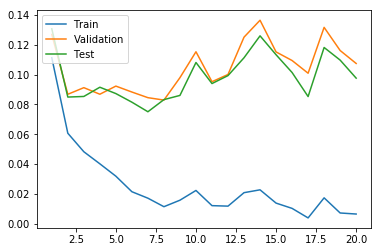

In [245]:
epochs = np.arange(num_epochs + 1)
plt.plot(epochs[1:], loss_trains[1:])
plt.plot(epochs[1:], loss_vals[1:])
plt.plot(epochs[1:], loss_tests[1:])
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')